# Просто EDA

## Part 1: Intro

### Обзор данных
    

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions of units)

* EU_Sales - Sales in Europe (in millions of units)

* JP_Sales - Sales in Japan (in millions of units)

* Other_Sales - Sales in the rest of the world (in millions of units)

* Global_Sales - Total worldwide sales (in millions of units)


### Дополнение
    UNIT = American dollars. 
    in millions of units' == 'in millions of $'.


### Задания (Q):

* #### Q1: Игры с наибольшими и наименьшими продажами в Европе
* #### Q2: Игры с наибольшим заработком
* #### Q3: ТОП 5 игр, которые заработали больше всего в 2016
* #### Q4: Кол-во игр, продажи по которым привысили 1 млн 
* #### Q5: ТОП 10 игр, которые сдели заработок в 1 млн 
* #### Q6: Кол-во выпусков игр в год
* #### Q7: ТОП 10 платформ, где были выпуски игр
* #### Q8: ТОП 3 платформы, где больше игр c продажами более 1 млн
* #### Q9: Сводная таблица платформы - жанры
* #### Q10: ТОП 10 компаний, которые выпускали игры
* #### Q11: ТОП 10 компаний по заработку на играх
* #### Q12: ТОП 3 компаний в регионах
* #### Q13: ТОП 3 платформ по заработку в регионах
* #### Q14: ТОП 3 игр по годовому заработку в регионах
* #### Q15: ТОП 3 жанров по заработку в регионах
* #### Q16: ТОП 3 компаний по заработку в регионах

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
import warnings
warnings.filterwarnings("ignore")

* ### Читаем файл ‘vgsales.csv’

In [42]:
df = pd.read_csv('vgsales.csv')

# какой формат выбрать для Spark, оставить в .csv или пределеать в AVRO|PARQUET?

**Доп.Задание**

Сделайте сравнение форматов: csv и parquet / avro:

- как измерить скорость работы?
- как использовать компрессию (сжатие)

**Apache Parquet** — это бинарный, колоночно-ориентированный (столбцовый) формат хранения больших данных

**+**

- экономия места для хранения данных за счет эффективного сжатия информации по столбцам
- высокая скорость чтения данных и отработки запросов, извлекающих определенные значения столбцов вместо считывания всего большого файла
- возможность реализации собственных схем данных и применения различных методов кодирования к различным столбцам
- простота и удобство работы с файлами с помощью операций перемещения, резервного копирования и реплицирования


**-**

- рогая типизация данных – в связи с колоночной ориентацией файл формата
- отсутствие встроенной поддержки в других фреймворках Big Data, кроме Apache Spark
- сутствие возможности отслеживать изменение данных и эволюцию схемы
- сильная привязка к метаданным – при повреждении, потере метаданных или изменении контрольной суммы группы строк, блока данных столбца или страницы данных, вся смысловая информация будет утеряна
- Паркет не является человекочитаемым форматом

![](pc.png)

* ### Обзор первых и последних строк файла

In [37]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.tail(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
# размерность
df.shape

(16598, 11)

In [5]:
# схема DataFramа
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# дубликаты
sum(df.duplicated())

0

In [7]:
# Поиск пропусков в данных
na_columns = [i for i in df.columns if df[i].isnull().any()]
print(df.isnull().sum())
na_columns


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


['Year', 'Publisher']

In [8]:
# замена пустых значений медианой
na_columns_fill = ['Year']
df.fillna(df.mean(), inplace = True)

In [9]:
# 'Publisher' заменим на None
na_columns_fill = ['Publisher']
for col in na_columns_fill:
    df[col].fillna('None',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


* ### Изменение формата колонки 'Year'


In [11]:
change_type=['Year']

# меняем на другой тип данных
df[change_type]=df[change_type].applymap(np.int64)

df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


* ### Numerical / Categorical данные

In [15]:
# кол-во данных, которые имеют тип Numerical / Categorical
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print ('Numerical: ', len(numerical_feats))
print (df[numerical_feats].columns)

print ("\n")

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print ('Categorical: ', len(categorical_feats))
print (df[categorical_feats].columns)

Numerical:  7
Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


Categorical:  4
Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')


Количество уникальных данных в 4 основных параметрах (колонках)

In [16]:
names = df['Name'].unique()
print("games: ", len(names))

publishers = df['Publisher'].unique()
print("publishers: ", len(publishers))

platforms = df['Platform'].unique()
print("platforms: ", len(platforms))

genres = df['Genre'].unique()
print("genres: ", len(genres))

games:  11493
publishers:  579
platforms:  31
genres:  12


In [ ]:
# Как сделать аналог df[columns].value_counts() в PySpark?

In [ ]:
# найдем минимальные и максимальные значения (заработка) по платформам

## SQL (SPARK)

In [ ]:
# регистрация DF в Spark, как 
df.createOrReplaceTempView('GDP')

In [ ]:
# теперь sql запросы будут нашими помощниками
spark.sql('select Country from GDP').show(5)

## Q & A анализ

### Q 1

In [18]:
# расчет статистики через функцию
def calculate(column):
    
    # наибольший заработок
    high= df[column].idxmax()
    high_val=pd.DataFrame(df.loc[high])
    
    # Наименьший заработок
    low= df[column].idxmin()
    low_val=pd.DataFrame(df.loc[low])
    
    # данные в 1 DF
    info=pd.concat([high_val, low_val], axis=1)
    
    return info

# вызов функции с нужной колонкой
calculate('EU_Sales')

,0,147
Rank,1,148
Name,Wii Sports,Final Fantasy XII
Platform,Wii,PS2
Year,2006,2006
Genre,Sports,Role-Playing
Publisher,Nintendo,Square Enix
NA_Sales,41.49,1.88
EU_Sales,29.02,0
JP_Sales,3.77,2.33
Other_Sales,8.46,1.74


### Q 2

In [20]:
# Найдем топ по продажам
def top(df, n = 1, column = 'Global_Sales'):
    # возврат сортированного DF по колонке с топом
    return df.sort_values(by=column)[-n:]

# группируем и указываем функцию группировки
df.groupby(['Year'], group_keys=False).apply(top)[['Year', 'Name','Global_Sales' ]]


#
# Доп.Задание в Spark
# Cделайте rolling window по Global_Sales 
# => сумма (кумулятивно), cумма экспоненциальным плавающим окном с агрегатов в 3 строки

,Year,Name,Global_Sales
258,1980,Asteroids,4.31
239,1981,Pitfall!,4.50
89,1982,Pac-Man,7.81
421,1983,Baseball,3.20
9,1984,Duck Hunt,28.31
1,1985,Super Mario Bros.,40.24
127,1986,The Legend of Zelda,6.51
251,1987,Zelda II: The Adventure of Link,4.38
22,1988,Super Mario Bros. 3,17.28
5,1989,Tetris,30.26


### Q 3

In [22]:
# игры с заработком в 2016
high_rev_data = df[df['Year'] == 2016]

# перестановка индексов для нового DF
high_rev_data.index = range(len(high_rev_data))

# установка индекса с 1
high_rev_data.index = high_rev_data.index + 1

# обзор нового DF
high_rev_data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
2,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
3,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
4,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
5,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01


### Q 4

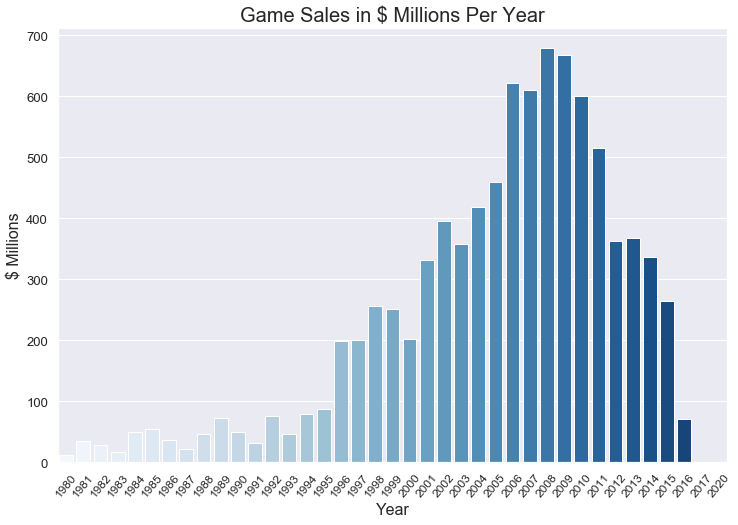

In [53]:
# сделаем вычисление по заработку в год
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

# Сделаем визуализацию (а как можно сделать это Spark?)
plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x, palette = 'Blues')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

### Q 5

! **Внимание**, многие действия в вопросах Q5 - Q8 и Q10 - Q11 будут повторятся.

При перестроения кода в Spark подумайте над функцией, которая помогла бы исключить повторяемость кода



In [23]:
# сделаем расчет по названию и посчитаем суммы
data = df.groupby(['Name']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
name = data.index
name


Index(['Wii Sports', 'Grand Theft Auto V', 'Super Mario Bros.', 'Tetris',
       'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue',
       'Call of Duty: Black Ops', 'Call of Duty: Modern Warfare 3',
       'New Super Mario Bros.'],
      dtype='object', name='Name')

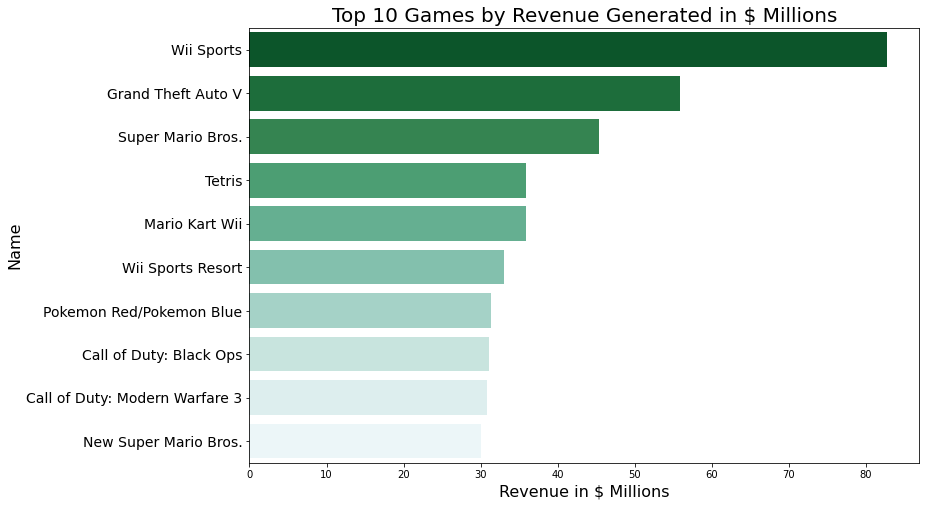

In [24]:
# Визуализируем данный результат
plt.figure(figsize=(12,8))
colors = sns.color_palette("gist_earth", len(data))
ax = sns.barplot(y = name, x = 'Global_Sales', data=data, orient='h', palette='BuGn_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Top 10 Games by Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = name, fontsize=14)
plt.show();

### Q 6

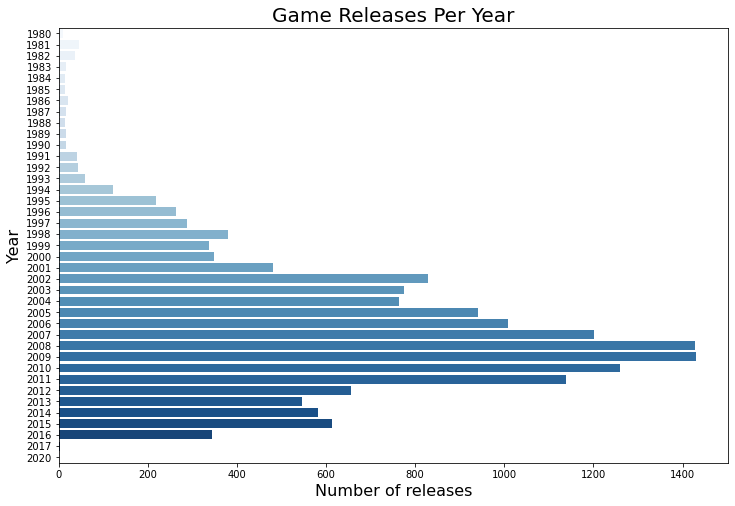

In [26]:
# Сделаем похожее действие (но с другим методом агрегации)
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

# Визуализация
plt.figure(figsize=(12,8))
colors = sns.color_palette()
ax = sns.barplot(y = y, x = x, orient='h', palette='Blues')
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

### Q 7

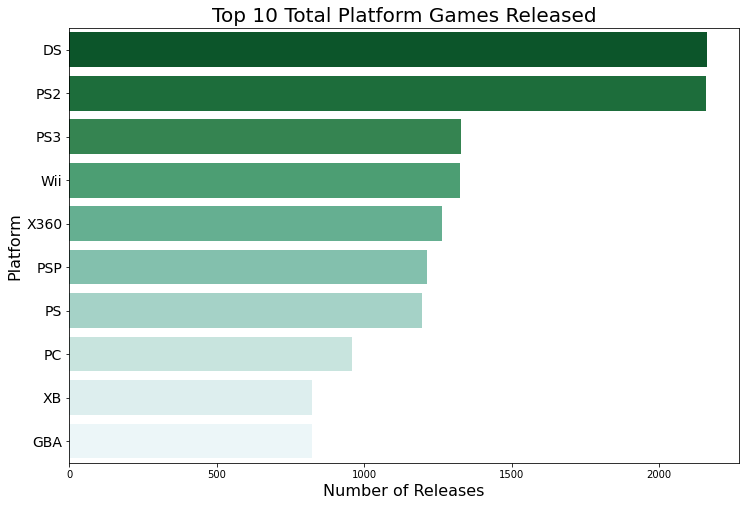

In [27]:
# Отбор топ платформ
data = df.groupby(['Platform']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
platforms = data.index
data.columns = ['Releases']

# визуализация
colors = sns.color_palette("gist_earth", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = platforms , x = 'Releases', data=data, orient='h', palette='BuGn_r')
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Platform', fontsize=16)
ax.set_title(label='Top 10 Total Platform Games Released', fontsize=20)
ax.set_yticklabels(labels = platforms, fontsize=14)
plt.show();

### Q 8

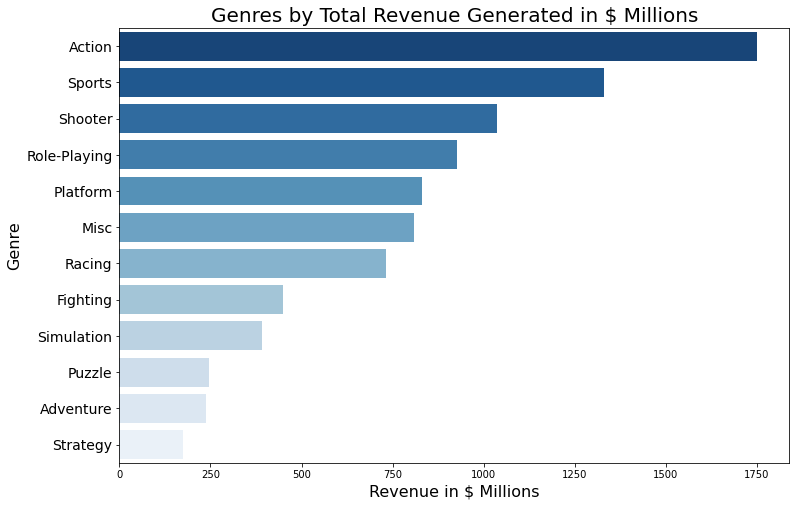

In [28]:
# повторяем действие по агрегации, но по другому параметру
rev = df.groupby(['Genre']).sum()['Global_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

# визуализируем
colors = sns.color_palette("gist_earth", len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette='Blues_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

### Q 9

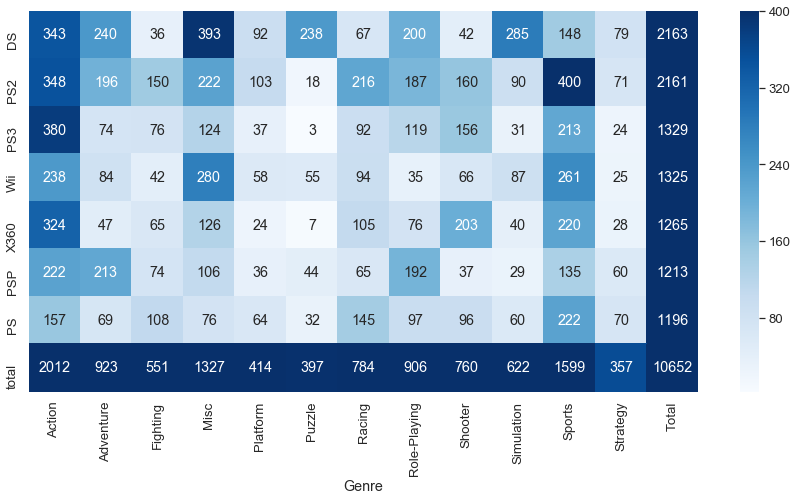

In [59]:
# один из способов построения сводных таблиц - crosstab (так же подходит для расчета корреляций)
platfGenre = pd.crosstab(df.Platform, df.Genre)
platfGenreTotal = platfGenre.sum(axis=1).sort_values(ascending = False)

# Сделаем визуализация в 
platfGenre['Total'] = platfGenre.sum(axis=1)
popPlatform = platfGenre[platfGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=1.2)
plt.figure(figsize=(15,7))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d", cmap = 'Blues')
plt.xticks(rotation = 90)
plt.show()

### Q 10

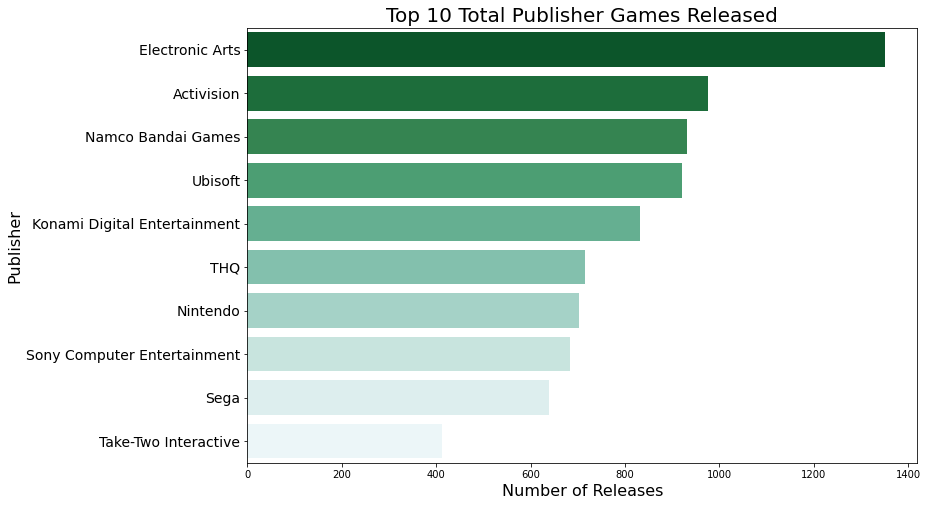

In [29]:
# Топ по издателям
data = df.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Releases']

# визуализация
colors = sns.color_palette("gist_earth", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h',  palette='BuGn_r')
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();


### Q 11

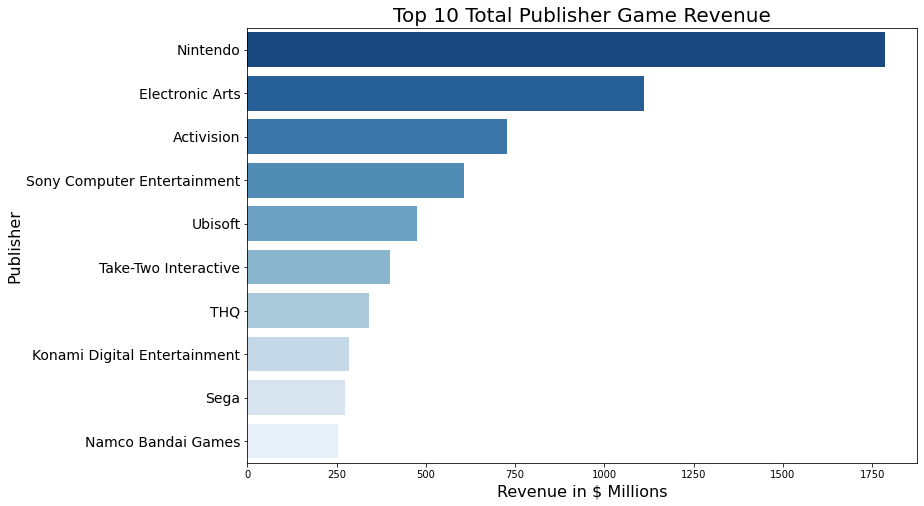

In [30]:
# Топ продаж по издателям
data = df.groupby(['Publisher']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Global Sales']

# визуализация
colors = sns.color_palette("gist_earth", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=data, orient='h', palette='Blues_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

### Q 12

In [31]:
# функция для трансформации labels в визуализации
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)

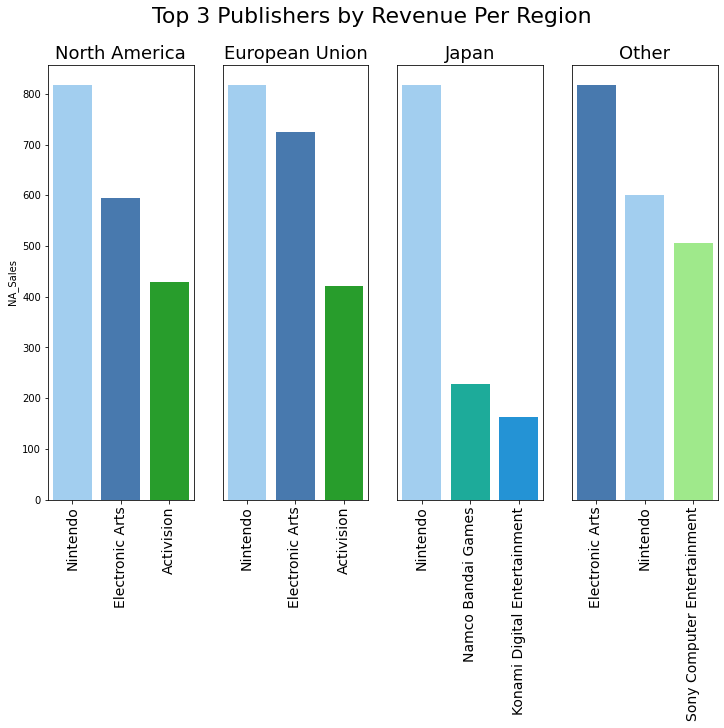

In [34]:
# очень повторяемый код

# нужно извлечь 4 разные агрегации по регионам
NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

Other = df.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

# оформляем цвета
colors =  {'Nintendo':sns.xkcd_rgb["light blue"], 'Electronic Arts':sns.xkcd_rgb["windows blue"], 'Activision':sns.xkcd_rgb["green"], 'Namco Bandai Games':sns.xkcd_rgb["turquoise"], 'Konami Digital Entertainment':sns.xkcd_rgb["azure"], 'Sony Computer Entertainment':sns.xkcd_rgb["light green"]}
fig = plt.figure(figsize=(12,8))

# визуализация
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_publishers, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_publishers, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = JP_publishers, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show();

### Q 13

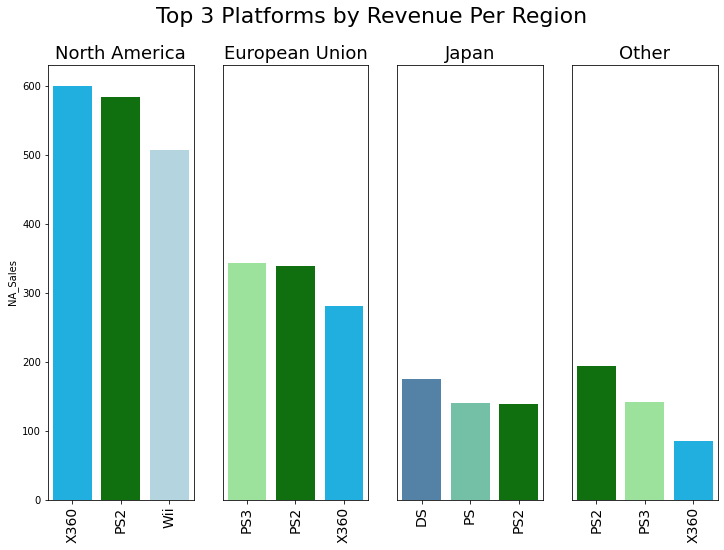

In [35]:
# Повторим тоже самое по платформам
NA = df.pivot_table('NA_Sales', columns='Platform', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_platforms = NA.index

EU = df.pivot_table('EU_Sales', columns='Platform', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_platforms = EU.index

JP = df.pivot_table('JP_Sales', columns='Platform', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_platforms = JP.index

Other = df.pivot_table('Other_Sales', columns='Platform', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_platforms = Other.index

colors =  {'PS':"mediumaquamarine", 'PS2':"green", 'PS3':"lightgreen", 'DS':"steelblue", 'X360':"deepskyblue", 'Wii':"lightblue"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_platforms, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_platforms, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = EU_platforms, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_platforms, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = JP_platforms, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_platforms, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_platforms, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_platforms, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Platforms by Revenue Per Region', size=22)
plt.show();

### Q 14

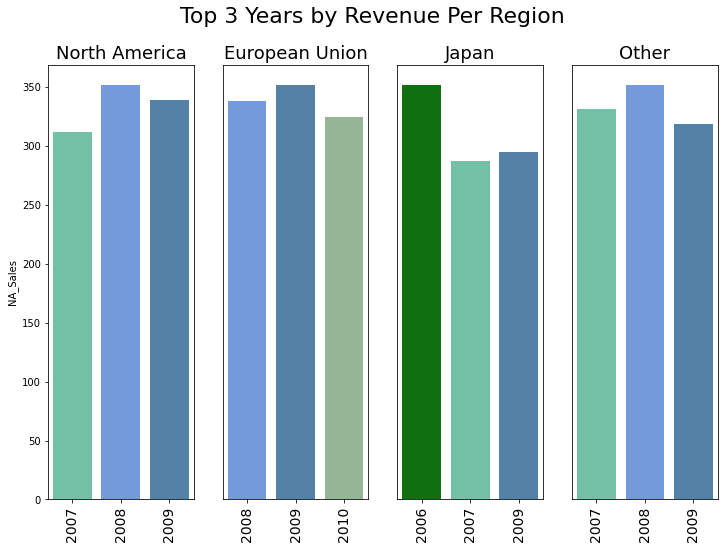

In [39]:
# Вы заметили, что код на вопросы опять повторяется
# Q12 - Q16 возможно переделать в функцию?

NA = df.pivot_table('NA_Sales', columns='Year', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_years = NA.index.astype(int)

EU = df.pivot_table('EU_Sales', columns='Year', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_years = EU.index.astype(int)

JP = df.pivot_table('JP_Sales', columns='Year', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_years = JP.index.astype(int)

Other = df.pivot_table('Other_Sales', columns='Year', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_years = Other.index.astype(int)

colors =  {2006.0:"green", 2007.0:"mediumaquamarine", 2008.0:"cornflowerblue", 2009.0:"steelblue", 2010.0:"darkseagreen"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_years, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_years, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_years, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_years, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = JP_years, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_years, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_years, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Years by Revenue Per Region', size=22)
plt.show();

### Q 15

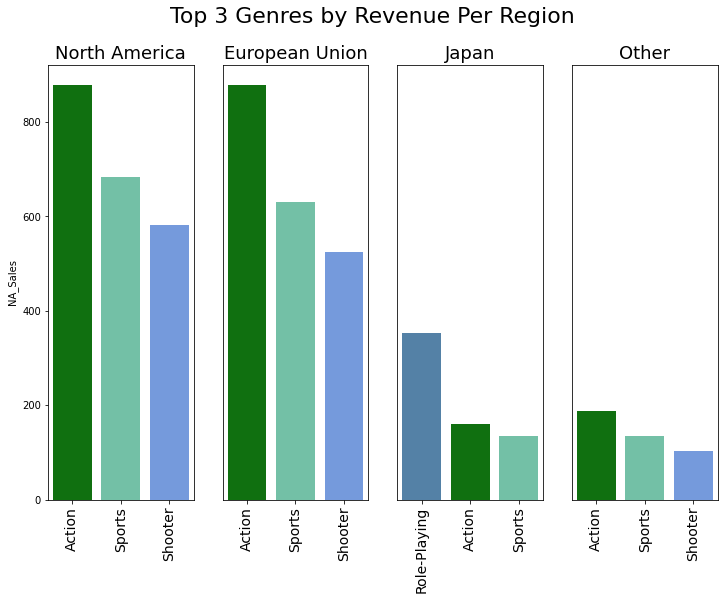

In [38]:
NA = df.pivot_table('NA_Sales', columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_genres = NA.index

EU = df.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_genres = EU.index

JP = df.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_genres = JP.index

Other = df.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_genres = Other.index

colors =  {'Action':"green", 'Sports':"mediumaquamarine", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1, sharey=ax1)
ax1.set_xticklabels(labels = NA_genres, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_genres, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_genres, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_genres, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)


ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = JP_genres, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_genres, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();


### Q 16

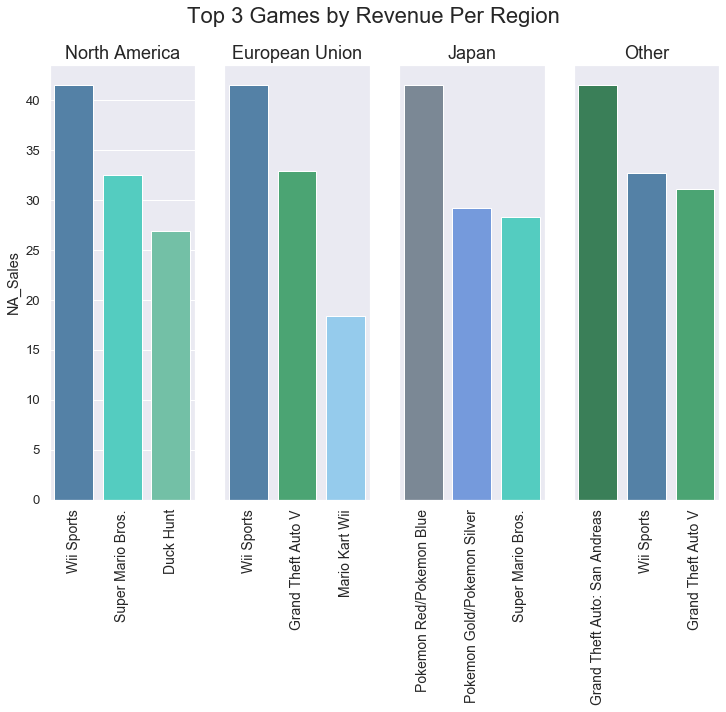

In [67]:
NA = df.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_games = NA.index

EU = df.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_games = EU.index

JP = df.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_games = JP.index

Other = df.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_games = Other.index

colors =  {'Wii Sports':"steelblue", 'Grand Theft Auto V':"mediumseagreen", 'Mario Kart Wii':"lightskyblue", 'Pokemon Red/Pokemon Blue':"lightslategray", 'Pokemon Gold/Pokemon Silver':"cornflowerblue", 'Super Mario Bros.':"turquoise", 'Duck Hunt':"mediumaquamarine", 'Grand Theft Auto: San Andreas':"seagreen"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_games, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_games, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_games, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_games, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = JP_games, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_games, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_games, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Games by Revenue Per Region', size=22)
plt.show();

### Q 17

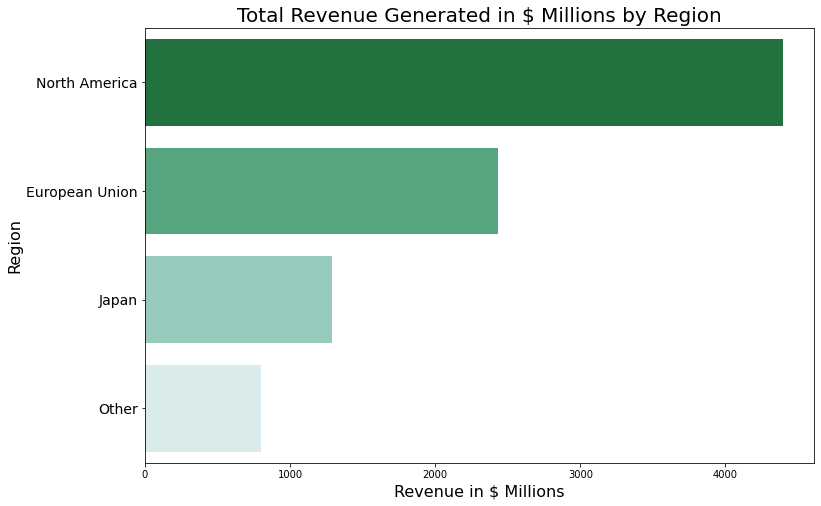

In [40]:
# расчет всего заработка с агрегатом по регионам
data = df.sum()
data = pd.DataFrame([ data['NA_Sales'], data['EU_Sales'], data['JP_Sales'], data['Other_Sales']])
regions = ['North America','European Union', 'Japan', 'Other']

# устанавливаем индекс в качестве агрегата
data.index = regions
data.columns = ['Revenue']
data = data.sort_values(by='Revenue', ascending=False)

# визуализация
plt.figure(figsize=(12,8))
colors = sns.color_palette("gist_earth", len(data))
ax = sns.barplot(y = regions , x = 'Revenue', data=data, orient='h', palette='BuGn_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Total Revenue Generated in $ Millions by Region', fontsize=20)
ax.set_yticklabels(labels = regions, fontsize=14)
plt.show();

Мы ответили на 17 вопросов, но поголи ли они нам исследовать данные? Конечно нет!